# 1. Importing necessary libraries

In [77]:
#basic libraries
import copy
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the dataset

In [94]:
df = pd.read_csv("./heart_disease_uci.csv", index_col = 'id')

# 3. Find out Data Types and Column Types

In [95]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


# 4. Data Cleaning

In [96]:
dataMissingValues = []
values_col = []
print('Total Rows: {}'.format(len(df)))
for col in df.columns:
	if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
	else: values_col = df[col].unique()
	dataMissingValues.append({ 
		'Column Name': col,
		'Missing values': df[col].isnull().sum(),
		'Unique Values': values_col
	})
pd.set_option('display.max_colwidth', 0)
pd.DataFrame(dataMissingValues)

Total Rows: 920


,Column Name,Missing values,Unique Values
0,age,0,50 values
1,sex,0,"[Male, Female]"
2,dataset,0,"[Cleveland, Hungary, Switzerland, VA Long Beach]"
3,cp,0,"[typical angina, asymptomatic, non-anginal, atypical angina]"
4,trestbps,59,62 values
5,chol,30,218 values
6,fbs,90,"[True, False, nan]"
7,restecg,2,"[lv hypertrophy, normal, st-t abnormality, nan]"
8,thalch,55,120 values
9,exang,55,"[False, True, nan]"


## Checking data characters mistakes

In [97]:
df['restecg'].replace(['st-t abnormality'], 'stt abnormality', inplace = True)
df['thal'].replace(['reversable defect'], 'reversible defect', inplace = True)

## Checking for missing values and replace them

Replacing numeric values for median values

In [98]:
for col in ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
	median = df[col].median()
	df[col].fillna(median, inplace=True)

Replacing some categorical values with the text 'Don\'t know'

In [99]:
for col in ['restecg', 'slope', 'thal']:
	df[col].fillna('Don\'t know', inplace=True)

Removing missing values when data can not be replaced

In [100]:
df = df.dropna(subset=['fbs', 'exang'])

## Checking for duplicate rows

In [101]:
df[df.duplicated()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
406,49,Female,Hungary,atypical angina,110.0,223.0,False,normal,160.0,False,0.0,Don't know,0.0,Don't know,0
908,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,stt abnormality,118.0,True,0.0,Don't know,0.0,Don't know,2


In [102]:
df = df.drop_duplicates()

## Statistics Summary

Summary Statistics for Numerical data

In [103]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,53.072445,132.791721,219.394567,138.672704,0.886546,0.260026,0.919793
std,9.434526,18.563135,92.693969,25.803567,1.082120,0.668242,1.133011
min,28.000000,0.000000,0.000000,60.000000,-1.000000,0.000000,0.000000
25%,46.000000,120.000000,198.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,269.000000,159.000000,1.500000,0.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Summary Statistics for Categorical data:

In [104]:
df.describe(exclude=[np.number])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,773,773,773,773,773,773,773,773
unique,2,4,4,2,4,2,4,4
top,Male,Cleveland,asymptomatic,False,normal,False,flat,Don't know
freq,593,304,405,656,468,469,316,369


## Outliers and how to remove them

To check for the presence of outliers, we plot Boxplot.

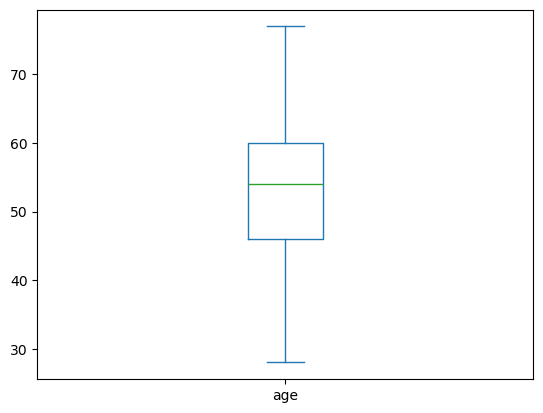

In [105]:
df['age'].plot(kind='box')
plt.show()

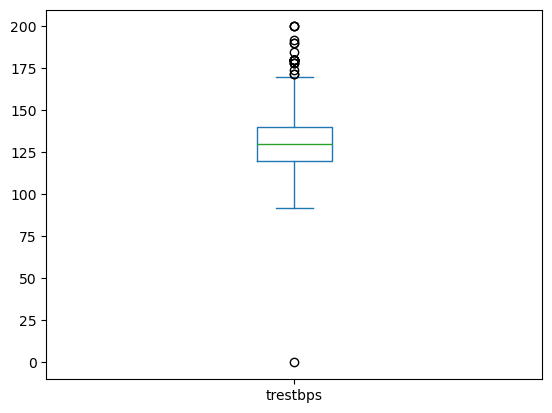

In [63]:
df['trestbps'].plot(kind='box')
plt.show()

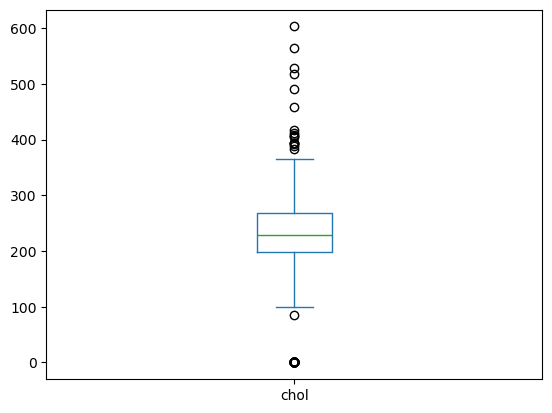

In [106]:
df['chol'].plot(kind='box')
plt.show()

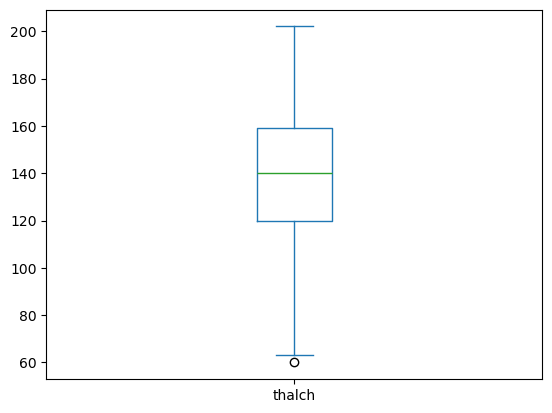

In [108]:
df['thalch'].plot(kind='box')
plt.show()

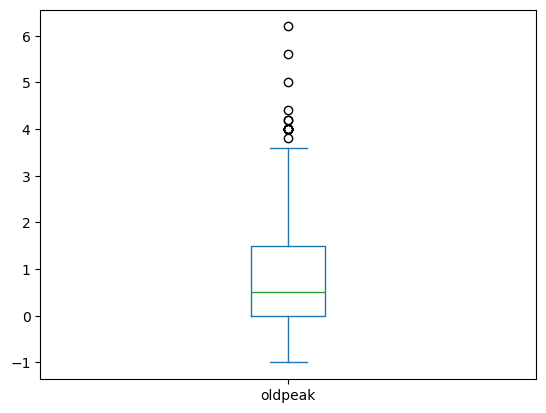

In [109]:
df['oldpeak'].plot(kind='box')
plt.show()

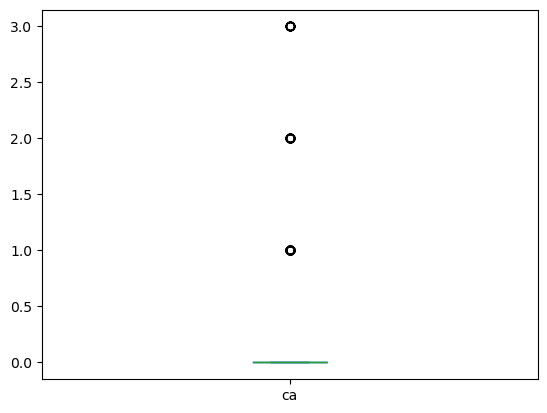

In [110]:
df['ca'].plot(kind='box')
plt.show()

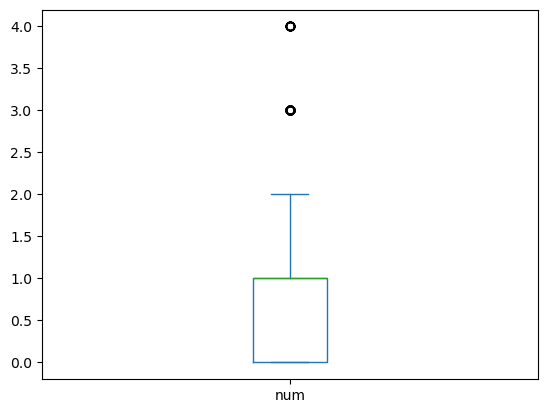

In [111]:
df['num'].plot(kind='box')
plt.show()

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


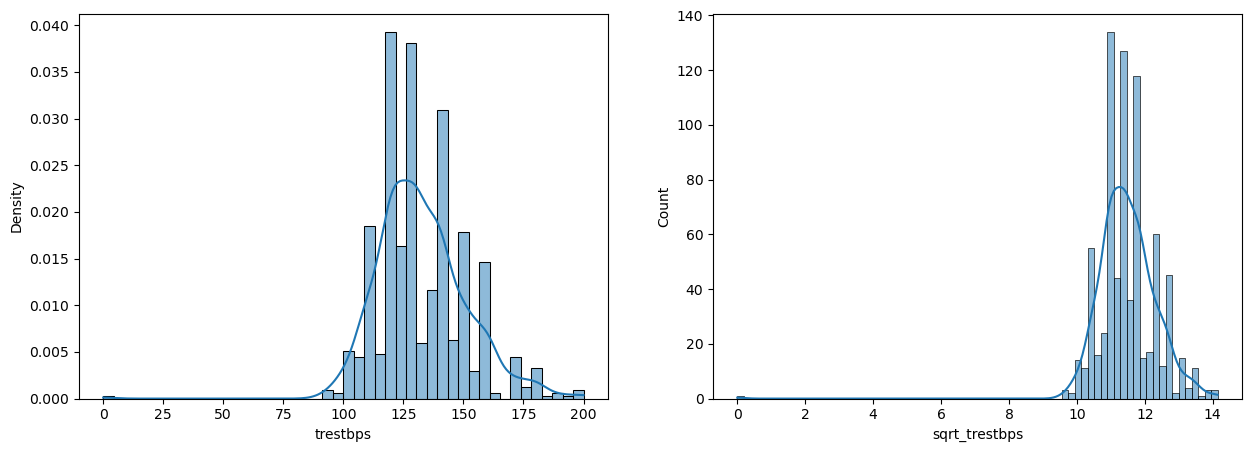

In [75]:
df['SQRT_trestbps'] = df['trestbps']**0.5
df['sqrt_trestbps'] = np.sqrt(df['trestbps'])
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df['trestbps'], ax=axes[0], kde=True)
sns.histplot(df['sqrt_trestbps'], ax=axes[1], kde=True)
plt.show()

# 5. Distributions and Relationships

## Categorical Variable Distribution

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


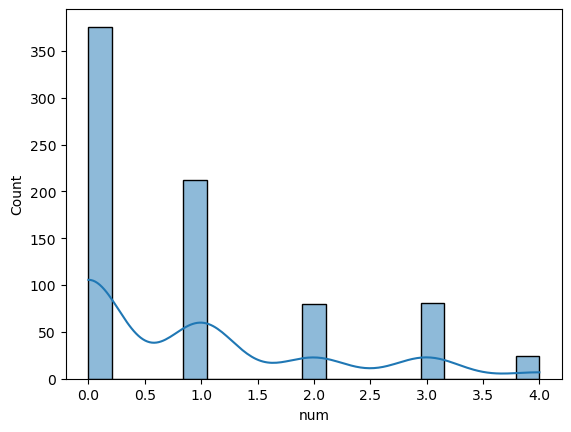

In [116]:
sns.histplot(df['num'], kde=True)
plt.show()

## Relationship between categorical and continues variables

# 6. Data Analysis and Visualization

## Age variable distribution

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


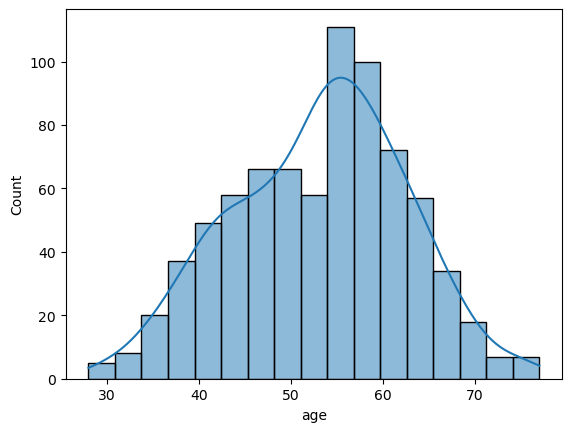

In [93]:
sns.histplot(df['age'], kde=True)
plt.show()

## Gender distribution accoding to target variable

## Chest pain distribution according to target variable

## Draw correlation using Pearson's Heat-map

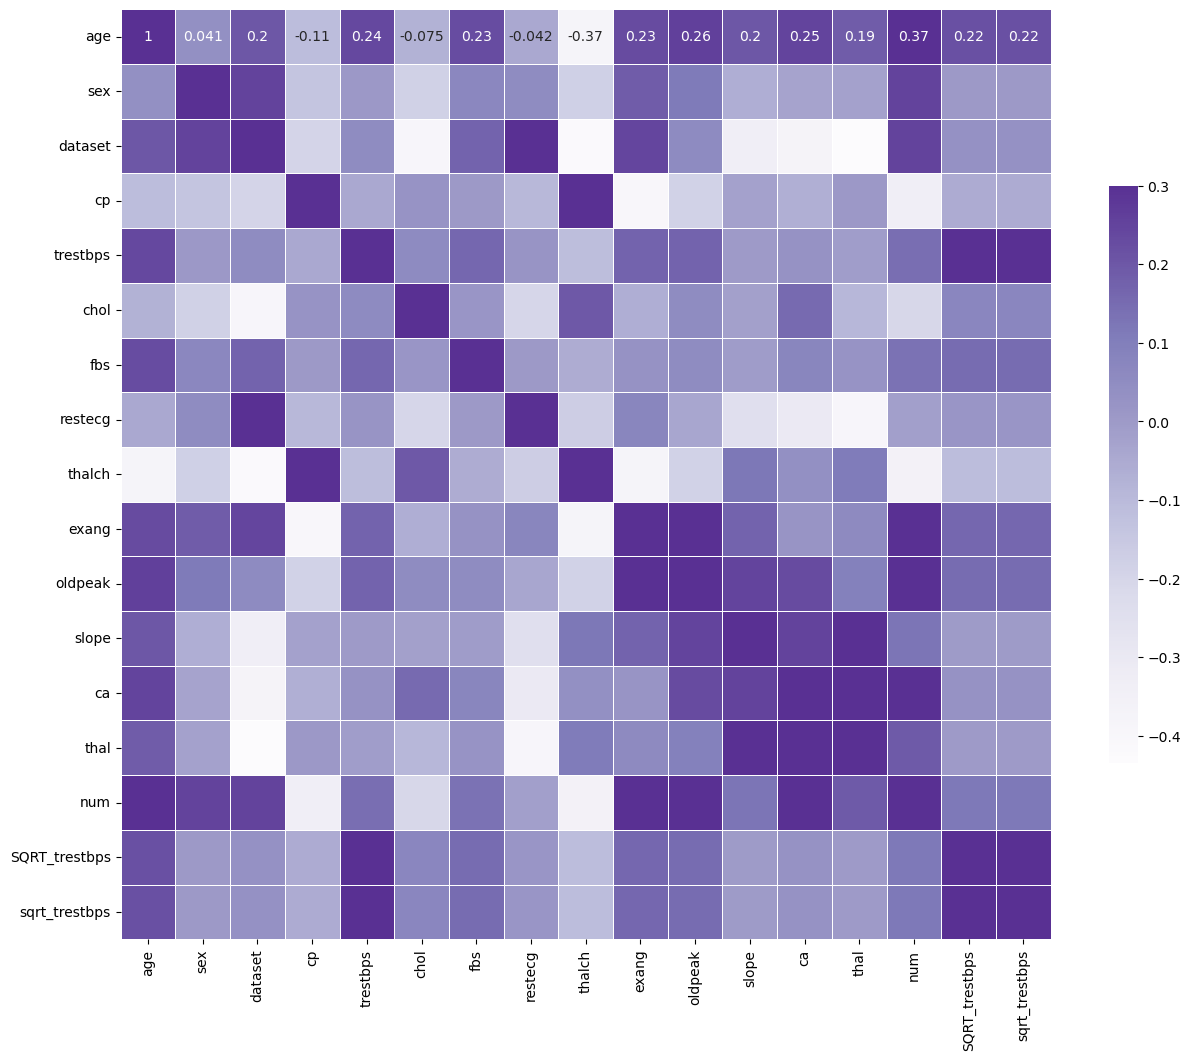

In [91]:
# Encoding the categorical variables
dfCorr = copy.deepcopy(df)
from sklearn.preprocessing import LabelEncoder
object_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    dfCorr[col] = label_encoder.transform(df[col])

# Correlation matrix
corr = dfCorr.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='Purples', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

# 7. Conclusions

1) Which ML model you would choose for this taks?

- Linear Regression

2) Write the equation for that model

- y = m*x + b

3) Explain the equation written in the previous question and explain all the terms in the dataset (Independent, Dependent, Features, Weights)

- y: Dependent variable
- m: Estimated slope
- x: Independent variable
- b: Estimated intercept